In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
#import scipy
#import matplotlib

In [2]:
#Colocando a base de dados num arquivo.
dados = pd.read_csv("./base/dados.csv")

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# Aula1: Distribuição Binomial

Um evento **binomial** é caracterizado pela possibilidade de ocorrência de apenas duas categorias. Estas categorias somadas representam todo os espaço amostral, sendo ;
também mutuamente excludentes, ou seja, a ocorrência de uma implica na não ocorrência da outra.

Em análises estatísticas o uso mais comum da distribuição binomial é na solução de problemas que envolvem situações de **sucesso** e **fracasso**.

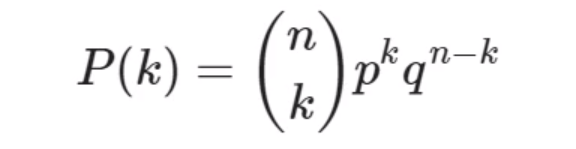

Onde:

_**p**_ = probabilidade de sucesso

_**q = (1 - p)**_ = probabilidade de fracasso

_**n**_ = número de eventos estudados

_**k**_ número de eventos desejados que tenham sucesso

### Experimento Binomial:

1. Realização de _n_ ensaios idênticos;
2. Os ensaios são independentes;
3. Somente dois resultados são possíveis;
4. A probabiidade de sucesso é representada por _**p**_ e a de fracasso por _**1 - p = q**_. Estas probabilidades não se modificam de ensaio para ensaio;

### Média da distribuição binomial:

O valor esperado ou a média da distribuição binomial é igual ao número de experimento realizados multiplicado pela chance de ocorrência do evento.

_**Med = n.p**_

### Desvio padrão da distribuição:

O desvio padrão é a raiz do produto entre o número de experimentos, a probabilidade de sucesso e a probabilidade de fracasso.

_**DesvP = Sqrt(n.p.q)**_

---
Lembrando que para calcular esse tipo de combinação: Número de combinações de _**n**_ objetos, tomados _**k**_ a cada vez, é:

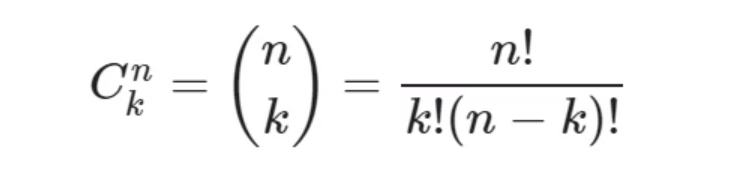

Precisamos utilizar a biblioteca do scipy, que faz rapidamente para a gente, por isso o seguinte import:

In [4]:
from scipy.special import comb

In [5]:
# Exemplo da megasena:
combinacoes = comb(60, 6)
print('{:,}'.format(combinacoes))

50,063,860.0


In [6]:
percentual = 1/combinacoes
print(percentual)

1.997448858318156e-08


In [7]:
print("{:.20f}".format(percentual))

0.00000001997448858318


In [8]:
#Exemplo do show do prêmio da Alura.
combinacoes2 = comb(25, 20)
percentual2 = 1/combinacoes2
print("Combinações = {:,}\nPercentual = {:.15f}".format(combinacoes2, percentual2))

Combinações = 53,130.0
Percentual = 0.000018821757952


## Exemplo do Concurso para Cientista de dados.

Problema de tentar acertar 5 questões.

Definindo os valores:

Número de ensaios (n) => 10.

Pelo enunciado é falado que são 10 questões. E acertar cada uma das questões não são dependentes se ele chutar de forma randômica, são duas possibilidades de resultado, acertar ou errar.

In [9]:
n = 10

In [10]:
#Probabilidade de sucesso
numero_de_alternativas_por_questao = 3
p = 1 / numero_de_alternativas_por_questao
p

0.3333333333333333

In [11]:
#Probabilidade de fracasso
q = 1 - p
q

0.6666666666666667

In [12]:
#Total de eventos em que se deseja obter sucesso:
k = 5

### Probabilidade de acertar 5 questões:

In [13]:
probabilidade = comb(n, k)*(p ** k)*(q **(n-k))
print("{:.8f}".format(probabilidade))

0.13656455


Isso é a forma manual de se fazer o trabalho. Tem uma outra forma que é mais direta, que precisa importar uma outra parte da biblioteca scipy. O link da documentação do comando se encontra [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html).

In [14]:
from scipy.stats import binom

In [15]:
# Com ele se torna mais simples a implementação:
probabilidade = binom.pmf(k, n, p)
print("{:.8f}".format(probabilidade))

0.13656455


### Probabilidade de passar para a próxima fase:

Agora não basta ter que ver somente a probabilidade de tirar 5, considerando que para passar tem que tirar 5 ou mais, ou seja, a soma das probabilidades.

In [16]:
#Levando as possibilidades de acertar 5, 6, 7, 8, 9, 10 questões.
k = 5
probabilidade = 0
for i in range(6):
    probabilidade += binom.pmf(k,n,p)
    k+=1
probabilidade

0.21312808006909492

In [17]:
# Outra forma de fazer a mesma coisa de forma mais simples.
probabilidade = binom.pmf([5,6,7,8,9,10], n,p).sum()
probabilidade

0.21312808006909492

### Função cumulativa partindo de 0 acertos:

In [18]:
# Chance de acertar 0 questões, 1, 2, 3 e 4 questões somadas.
binom.cdf(4, n, p)

0.7868719199309048

Se fizermos um menos esse valor, encontraremos o mesmo valor para ver se a pessoa consegue passar para próxima fase.

In [19]:
1 - binom.cdf(4,n,p)

0.21312808006909523

In [20]:
# Outra forma de fazer isso é utilizar o seguinte comando:
binom.sf(4,n,p)

0.21312808006909525

Que é exatamente a mesma expressão. O comando sf é igual a 1 - o comando cdf.

In [21]:
# Moeda jogada para cima 4 vezes, chance de cair 2 vezes coroa.

p = 1 / 2  # Probabilidade de sair COROA
n = 4      # Total de lançamentos
k = 2      # Total de sucessos (faces COROA voltada para cima)
binom.pmf(k,n,p)

0.375

In [22]:
# Dado jogado para cima 8 vezes, chance de cair 5 virado para cima pelo menos 3 vezes.
# O total de sucessos k é de 3 até 8.

p = 1 / 6   # Probabilidade de sair o número CINCO
n = 10      # Total de lançamentos
print("{0:.2%}".format(binom.sf(2, n, p)))

22.48%


## Exemplo: Gincana
Probabilidade fixa de escolher mulheres: 60%
número de grupos:12
Número de integrantes por grupo:8

Chance de ter grupo formado somente por mulheres.

In [23]:
p = 0.6
n = 12
k = 8
probabilidade = binom.pmf(k,n,p)
probabilidade

0.21284093952

In [24]:
# Quantidade de grupos formados só por mulheres:
equipe = 30 * probabilidade
equipe

6.3852281856

In [25]:
#O número é quebrado, mas podemos arrendondar com a justificativa de grupo inteiros.
int(equipe)

6

In [26]:
# Exemplo de famílias com 2 crianças com olhos azuis.
p = 0.22
n = 3
k = 2
probabilidade = binom.pmf(k,n,p)
print("Probabilidade de ter dois filhos com olhos azuis: {:.8f}".format(probabilidade))
num_de_familia = 50 * probabilidade
print("Quantidade de família com dois filhos com olhos azuis: {}".format(int(num_de_familia)))


Probabilidade de ter dois filhos com olhos azuis: 0.11325600
Quantidade de família com dois filhos com olhos azuis: 5


# Aula2: Distribuição de Poisson

Essa Distribuição é empregada para descrever número de ocorrências em um intervalo de tempo ou espaço específico, que nos permite contabilizar o sucesso, mas é impossível contar os fracassos, por exemplo.

Em um rápido exemplo de aplicação da Poisson, temos 1 quilometro de estrada em que conseguimos contabilizar o número de buracos neste trecho, mas não podemos contar o número de não-buracos.

Em um período de uma hora, podemos contabilizar quantas pessoas entraram em determinada loja do shopping, mas não podemos contar as pessoas que não entraram.

Calcularemos a seguinte forma:

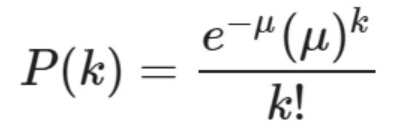

Sendo p a **probabilidade**, k o **número de sucesso em determinado intervalo desejado, seja de tempo ou espaço**. O e é o **número de Euler**, que utilizaremos da biblioteca Numpy para definir seu valor exato.

A letra grega _mu_, é a representação da Média da distribuição de Poisson, que as vezes precisa ser calculada, as vezes não.

Semelhante a distribuição binomial, a de Poisson apresenta a mesma característica de ter a mesma probabilidade de ocorrência em todo intervalo. Além de que cada intervalo independe de qualquer outro intervalo.

Por fim, o desvio padrão é igual a raiz quadrada de _mu_.

In [27]:
np.e

2.718281828459045

In [28]:
# Exemplo do restaurante de 20 pedidos por hora em média: probabilidade de 15 pedidos?
k = 15
mu = 20

In [29]:
probabilidade = ((np.e**(-mu)) * (mu**k)) /(np.math.factorial(k))
print("{:.4f} %".format(probabilidade*100))

5.1649 %


Uma outra forma de fazer esse trabalho é importando diretamente o comando para distribuição para Poisson.
Sua documentação pode ser encontrada através do link [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html).

In [30]:
from scipy.stats import poisson
probabilidade = poisson.pmf(k, mu)
print("{:.4f} %".format(probabilidade*100))

5.1649 %


In [31]:
# Caso de entrarem 25 pedidos do restaurante:
probabilidade = poisson.pmf(25, mu)
print("{:.4f} %".format(probabilidade*100))

4.4588 %


# Aula3: Distribuição Normal



É uma das distribuições mais utilizadas da estatística. É uma distribuição contínua, onde a distribuição de frequências de uma variável quantitativa apresenta a forma de "sino" e é simétrica em relação a sua média.

### Características importantes:

- Simétrica em relação a média;
- A área sobre a curva corresponde a proporção de 1 ou 100%;
- As medidas de tendência central (Média, mediana e moda) são o mesmo valor;
- Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo _x_;
- O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão;
- A distribuição é definida por sua média e seu desvio padrão;
- A probabilidade será sempre igual a área sob a curva, delimitada pelos limites inferior e superior;

A probabilidade toma a forma de:

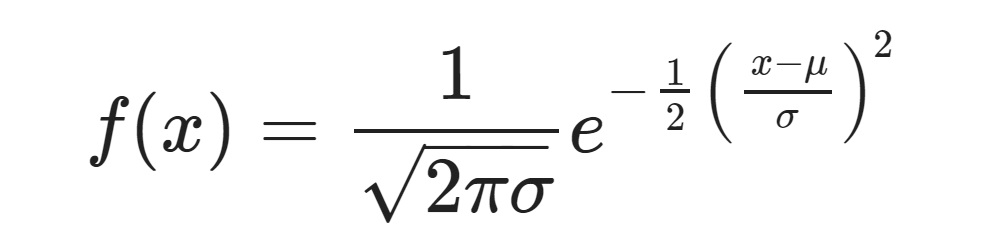

Temos a função f de x, onde x geralmente é a variável geralmente distribuída, sigma é o desvio padrão e mu é a média.

A probabilidade é a área calculada abaixo da curva da distribuição limitada pelo **Limite inferior Li** e o **Limite superior Ls**, tomando a seguinte forma da integral definida:

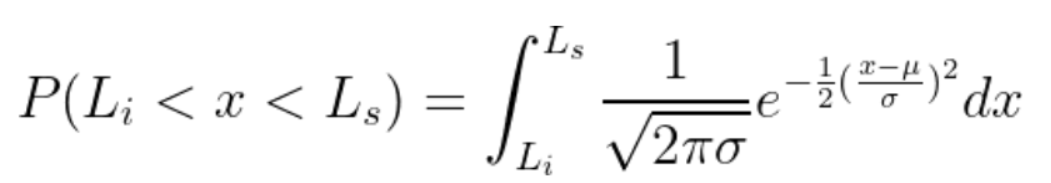

Não precisaremos calcular integrais, o programa fará isso para a gente.


Além disso há outra forma de lidar com esse programa, que ao invés de calcular integral, podemos fazer tabelas periodizadas!
Pois como só precisamos fazer o trabalho em cima da média e do desvio padrão, podemos pegar cada ponto da variável que tiver interesse e aplicar a seguinte equação, que tornará a variável numa variável normal padronizada:

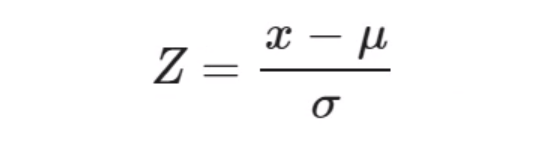

Sendo x a variável original e Z a nova variável que iremos trabalhar, pegamos a variável x e subtraímos da média e desse resultado dividimos pelo desvio padrão. Isso padroniza a tabela que podeerá ser consultada atráves da tabela padronizada.

A partir daqui o professor faz um código para uma dataframe para fazer essa tabela, esse código está disponível no notebook da aula 3 desse curso.




In [32]:
# Tinha duas outras importações aqui que já fiz lá em cima.
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [], 
        index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
        columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


## Exemplo: Qual é a sua altura?

Uma distribuição normal de altura que tem como média 1,70 e desvio padrão de 0,1. 
Queremos saber 3 coisas:

1. Probabilidade de uma pessoa, selecionada ao acaso, de ter menos de 1,80;
2. Probabilidade de uma pessoa, selecionada ao acaso, de ter entre 1,60 e 1,80;
3. Probabilidade de uma pessoa, selecionada ao acaso, de ter mais de 1,90;


Vamos dizer que a variável Z é a que queremos chegar que é 1,80m:

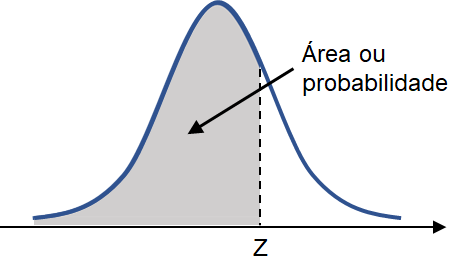


In [33]:
media = 1.7
desvio_padrao = 0.1

In [34]:
# Problema 1

Z = (1.8 - media)/desvio_padrao
Z

1.0000000000000009

In [35]:
#Como acessar esse valor na tabela? Somando linha e coluna de forma que chegue no valor de Z.
probabilidade = 0.8413

In [36]:
#Utilizando o scipy
#from scipy.stats import norm - já importei antes

#Queremos a forma cumulativa, assim por isso:
probabilidade = norm.cdf(Z)
probabilidade

0.8413447460685431

Link da a documentação do norm está [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

In [37]:
# Exemplo da prova de estatística
# from scipy.stats import norm - Já importado

media = 70
desvio_padrao = 5
Z = (85 - media) / desvio_padrao

norm.cdf(Z)

0.9986501019683699

Imagem para visualização do problema dois.

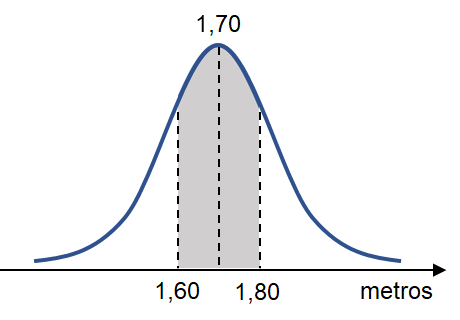

In [38]:
# Problema 2 - Altura entre 1,6 e 1,8.
media = 1.7
desvio_padrao = 0.1

Z1 = (1.8 - media) / desvio_padrao
Z2 = (1.6 - media) / desvio_padrao

probabilidade = norm.cdf(Z1) - norm.cdf(Z2)
probabilidade

0.6826894921370857

A gente pode fazer dessa forma, indo de pegando o cumulativo até 1,80m e diminuir do cumulativo de 1,60m.

Ou por ser simétrico, ir até 1,70m e fazer a mesma subtração e multiplicar por dois. Lembrando que até 1,70m é 50% do total, ou seja, 0,5. Logo só precisaria fazer um cálculo ao invés de dois.



In [39]:
probabilidade = (norm.cdf(Z1) - 0.5) * 2
probabilidade

0.6826894921370863

Uma terceira forma de tentar resolver isso seria com a utilização de uma simetria por fora, vamos dizer assim, ao invés da utilização do segundo termo para definir o cumulativo de 1,60, basta visualizar isso como se fosse o que falta para completar o cumulativo de 1,60!

E de fato eles se completam, por causa da simetria!


In [40]:
Soma = norm.cdf(Z1) + norm.cdf(Z2)
Soma

1.0000000000000004

Basicamente 1 ahhahahahha

Onde eu quero chegar é que podemos pensar que o cumulativo de 1,60 é igual ao total menos o cumulativo de 1,80.


In [41]:
probabilidade = norm.cdf(Z1) - (1 - norm.cdf(Z1))
probabilidade

0.6826894921370863

In [42]:
# Faturamento diário
media2 = 300
desvio_padrao2 = 50
Z_superior = (350 - media2) / desvio_padrao2
Z_inferior = (250 - media2) / desvio_padrao2

probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
print("{}".format(probabilidade*100))

Z_superior = (500 - media2) / desvio_padrao2
Z_inferior = (400 - media2) / desvio_padrao2

probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
print("{}".format(probabilidade*100))

68.26894921370858
2.271846070634609


In [43]:
# Problema 3 - Maiores que 1,90m

#Definindo o valor para Z3
Z3 = (1.9 - media)/desvio_padrao

probabilidade = 1 - norm.cdf(Z3)
probabilidade

0.02275013194817921

In [44]:
# Outra forma
probabilidade = norm.sf(Z3)
probabilidade

0.022750131948179216

In [45]:
#Vida Util
media2 = 720
desvio_padrao2 = 30
#A
Z_superior = (750 - media2) / desvio_padrao2
Z_inferior = (650 - media2) / desvio_padrao2

probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
print("{}".format(probabilidade*100))

#B
Z = (800 - media2) / desvio_padrao2
probabilidade = norm.cdf(-Z)
print("{}".format(probabilidade*100))

#C
Z = (700 - media2) / desvio_padrao2
probabilidade = norm.cdf(Z)
print("{}".format(probabilidade*100))




83.15294174398976
0.3830380567589736
25.24925375469229


In [46]:
#Obtendo probabilidades
Z = 1.96
probabilidade = norm.cdf(Z)
print("{}".format(probabilidade*100))

Z = 2.15
probabilidade = norm.sf(Z)
print("{}".format(probabilidade*100))

Z = -0.78
probabilidade = norm.cdf(Z)
print("{}".format(probabilidade*100))

Z = 0.59
probabilidade = norm.sf(Z)
print("{}".format(probabilidade*100))


97.50021048517794
1.57776073910905
21.769543758573313
27.759532475346493


# Aula4: Técnicas de amostragem

Devemos saber quando usar amostras pensando em populações finitas ou infinitas (só usando em infinitas), pensando também em custo operacional, se é possível pagar para fazer a amostragem ou não. Testes destrutivos ou resultados rápidos também valem a pena para estudar com amostras.

In [47]:
#Quantidade de registros do arquivo csv:
dados.shape[0]

76840

In [48]:
#Pegando a média de renda desses registros, desse total de 76840 pessoas entrevistadas:
dados.Renda.mean()

2000.3831988547631

Vamos fazer um cálculo que a partir de uma dada quantidade de pessoas, fazendo uma amostra, chegar bem perto do valor médio da renda.

In [49]:
# Criaremos uma amostra com 100 registro e com um random_state valendo 101, que é como 
# se fosse um seed que nos faz pegar sempre as mesmas pessoas para fazer esse cálculo
amostra = dados.sample(n = 100, random_state= 101)

In [50]:
#Quantidade de registro da amostra:
amostra.shape[0]

100

In [51]:
amostra.Renda.mean()

2150.85

In [52]:
#Comparando porcentagem de homens e mulheres do dados para a amostra
dados.Sexo.value_counts(normalize=True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [53]:
amostra.Sexo.value_counts(normalize=True)

0    0.69
1    0.31
Name: Sexo, dtype: float64

Esses valores são muito próximos, mas casos tentemos pegar mais registros, não necessariamente eles irão ficar mais acurados. A ideia é que eles variem em torno do valor do todo com uma margem de erro. A ideia daqui a pouco será lidar com essa margem de erro.

Duas outras formas de amostragem é a estratificada e a por conglomerado:
- Estratificada é divisão de dados por subgrupos definidos por uma característica similar, grupos mais homogêneos. 
- Por Conglomerados é separada por região territorial, bairros ou estados, não precisando ser homogêneos os grupos.

Após essas divisões, entraria a **amostra aleatória simples** que aplicamos acima.

# Aula5: Estimativa

Agora trabalharemos de estimativas em cima dos dados adquiridos pela amostra. Quando trabalhando com o conjunto total, temos valores numéricos definidos, seja alguma média de idade, renda etc. Mas quando lidando com amostras, temos que levar em conta uma margem para erro em relação ao total da população da amostra.

Para entender melhor o professor parte de um problema interessante:

Suponha que os pesos dos sacos de arroz de uma industria alimentícia se distribuem aproximadamente como uma normal de desvio padrão populacional igual a 150g. Selecionada uma amostra aleatória de 20 sacos de um lote específico, obteve-se um peso médio de 5050g. Construa um intervalo de confiança para a média populacional assumindo um nível de significância de 5%.

Principais pontos:
- Desvio padrão populacional igual a 150g;
- Amostra aleatória de 20 sacos;
- Peso médio de 5050g;
- Queremos um intervalo de confiança para a média populacional assumindo um nível de significância de 5%.


Definindo antes 2 termos para ficar claro:

> **Parâmetros** São os atributos numéricos de uma população, tal como média, desvio padrão, etc;

> **Estimativa** é o valor obtido para determinado parâmetro a partir dos dados de uma amostra da população.


E a seguir um teorema importante:

## Teorema do limite central:

Esse teorema afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal como média igual à média da população e desvio padrão igual ao desvio parão da variável original dividido pela raiz quadrada do tamanho da amostra. Esse fato é assegurado quando n é maior ou igual a 30, sendo n a quantidade de registros, indivíduos, na amostra.

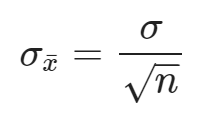

O cálculo do Desvio Padrão das Médias Amostrais é conhecido como Erro Padrão da Média. Por isso estamos vendo um Teorema de Limite Central, o qual será muito importante para calcularmos o Erro Inferencial, Intervalo de Confiança e o tamanho de amostra.

Então partirmos de uma situação definindo n = 2000. Trabalhando no dataset que temos:


In [54]:
n = 2000
total_de_amostras = 1500

In [55]:
amostras = pd.DataFrame()
amostras

""


In [ ]:
# Essa célula está com vários errors de performance, aparentemente tem um valor que está errado
# Não rodar essa célula.

for i in range(total_de_amostras):
    ab = dados.Idade.sample(n)
    ab.index = range(0, len(ab))
    amostras["Amostra_" + str(i)] = ab

amostras

Uma leve explicação do que foi feito agora é a criação de 1500 amostras com cada uma tendo o total de 2000 registros.

No código, fizemos o _ receber a amostra, definimos o index dele pelo tamanho de _ , ou seja 2000, e por fim cada _ é uma coluna. E plotamos ela.


Isso foi feito par mostrar que com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal.

In [57]:
# Fazendo a média:
amostras.mean()

Amostra_0       43.6600
Amostra_1       44.1195
Amostra_2       43.6325
Amostra_3       44.0315
Amostra_4       44.0775
                 ...   
Amostra_1495    43.6565
Amostra_1496    44.6390
Amostra_1497    44.1880
Amostra_1498    44.5030
Amostra_1499    43.5295
Length: 1500, dtype: float64

<AxesSubplot:>

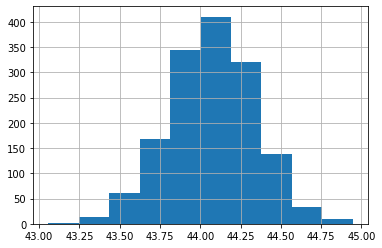

In [58]:
#Fazendo um histograma dessas médias:
amostras.mean().hist()

Em que se aumentássemos a quantidade de bins, teríamos uma distribuição cada vez mais normal.

Agora vamos comparar o valor da Idade do conjunto total com a média das médias da Idade de cada amostra, ou seja:

In [59]:
# Valor da Idade média do conjunto total:
dados.Idade.mean()

44.07142113482561

In [60]:
# Pegando a média das médias das amostras (Idade)
amostras.mean().mean()

44.071672

Agora vamos ver o desvio padrão. Lembrando que o desvio padrão é igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra.

In [61]:
# Desvio padrão de uma amostra
amostras.mean().std()

0.2687067670040259

In [62]:
dados.Idade.std()

12.48058346535974

In [63]:
# Achando o desvio padrão pela equação dada:
dados.Idade.std() / np.sqrt(n)

0.27907433027404266

Achando os dois valores 0.282 e 0.279 são bem próximos.

## Nível de confiança e significância;

O nível de confiança, representado por ( 1 - α ) representa a probabilidade de acerto da estimativa. De forma complementar o nível de significância (α, soma dos dois lados da curva de α/2) expressa a probabilidade de erro da estimativa.

O nível de confiança de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado figura abaixo:

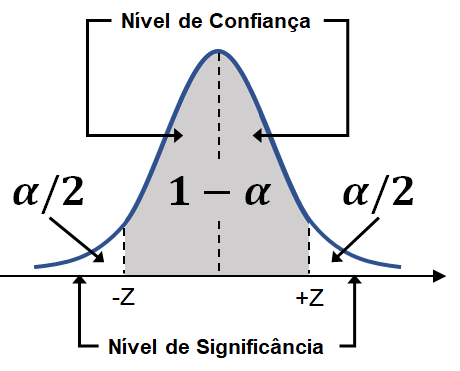

Confiança é probabilidade de acerto da estimativa e significância é probabilidade de erro.

Já sabemos como calcular essa áreas e descobrir o z sobre os intervalos e descobrir o tamanho de amostra ou um Erro Inferencial. Esse último é obtido através do desvio padrão das Médias Amostrais com o Teorema do Limite Central, como falamos no vídeo anterior. Sua fórmula é:

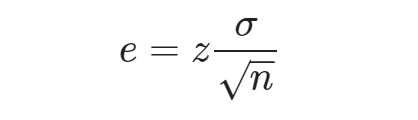

Na fórmula do Erro Inferencial, a margem de erro é obtido com o Z da curva normal vezes o desvio padrão das médias amostrais sobre raiz quadrada de n.


Com isso vamos descobrir como calcular esse Z e depois achar esses níveis de confiança e significância.

Fórmulas para o intervalo de confiança para a média populacional, sendo a primeira com o desvio padrão conhecido:

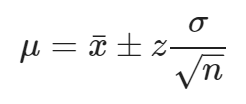

A segunda com o desvio padrão desconhecido:

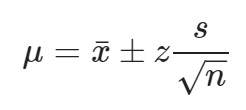


O _mu_ é o parâmetro da média populacional, igual a x barra, que é a média da amostra selecionada. O mais ou menos implica no intervalo superior e inferior.

E com esses intervalos, acharemos o Erro inferencial.


Com essas ideias em mente, voltemos para o problema inicial:

In [64]:
media_amostra = 5050
media_amostra

5050

In [65]:
#Nível de significância;
significancia = 0.05
significancia

0.05

In [66]:
# Nível de confiança:
confiança = 1 - significancia
confiança

0.95

In [67]:
#O código dela está lá em cima, acredito que na aula 2
tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389



O que queremos é visualizado a partirdessa imagem.

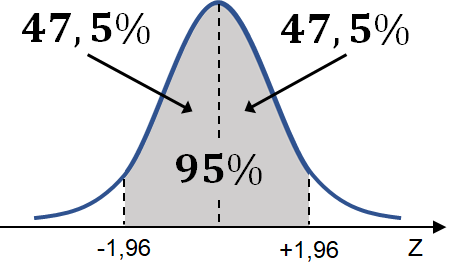

Queremos achar o z, que já está dado na imagem. Mas como chegamos nele?
Podemos pensar que através da média chegamos até 0.5, mas para chegar até o final, precisamos pensar a partir de outra forma:
Sabemos que o total da área azurada é 95% do total abaixo da linha, como sabemos que até a metade é 50% e a outra metade será metade da porcentagem hachurada, ou seja 95/2 = 47,5. Então isso significa que o total da soma das áreas será 0.5 + 0.475 que no total dará 0.975. E que esse valor bate exatamente com o Z = 1.96

In [68]:
norm.cdf(1.96)

0.9750021048517795

In [69]:
# Antes a gente aprendeu a calcular através dos dados encontrar Z, pegando a média 
# e o desvio padrão e aplicando z às funções das bibliotecas.

# Agora veremos uma função que faz isso para a gente, fazendo o contrário, só obtendo o valor da tabela, ou seja 
# encontrando a parte da área que ele significa, encontramos seu Z.

z = norm.ppf(0.975)
z

1.959963984540054

In [70]:
# Ele entrega com uma maior precisão, e agora podemos trabalhar em cima disso:
norm.cdf(z)

0.975

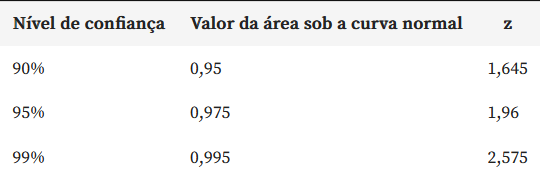

Uma tabela interessante para níveis de confiança mais padronizados. Tendo já seus valores de Z e de área bem definidos.

In [71]:
# Indo de fato para o problema agora:
desvio_padrao = 150
n = 20
raiz_de_n = np.sqrt(n)

In [72]:
sigma = desvio_padrao / raiz_de_n
sigma

33.54101966249684

In [73]:
e = z * sigma
e

65.73919054324361

Esse valor é o Erro inferencial sobre o problema de saco de arroz.

In [74]:
#Calculando o intervalo de confiança para a média:
intervalo = (media_amostra - e, media_amostra + e)
intervalo

(4984.260809456757, 5115.739190543243)

In [75]:
#A fórmula automática para calcular isso é através da seguinte função;
norm.interval(alpha = 0.95, loc = media_amostra, scale = sigma)

(4984.260809456757, 5115.739190543243)

Gera a mesma coisa, o detalhe é que toda a informação que a gente deu é o que precisa para fazer o intervalo, vendo pela função do intervalo, alpha nos daria o Z, loc é a média da amostra o x barra, e o scale é o sigma como já tinha sido dito.

In [76]:
# Exemplo de margem de erro:
n = 50
desvio_padrao2 = 6
z = norm.ppf(0.975)
erro_inferencial = z * (desvio_padrao2/np.sqrt(n))
erro_inferencial

1.6630845892196133

In [77]:
# Exemplo de Intervalo de confiança:
media_amostral = 28
desvio_padrao2 = 11
n = 1976

norm.interval(alpha = 0.90, 
                loc = media_amostral, 
                scale = desvio_padrao2 / np.sqrt(n))

(27.592969951356466, 28.407030048643534)

# Aula6: Calculando tamanho de amostra

## Cálculo para variáveis quantitativas e populações infinitas

Agora calcularemos um tamanho de amostra que seja realmente representativa da população que será estudada.

Já aprendemos a estudar Erro Inferencial e vamos começar a utilizar isso a partir de agora também. Aprendemos a obter o z de Distribuição de Probabilidade Normal, e utilizaremos essa ferramenta nas formas de cálculo de tamanho de amostra.

O problema: Estamos estudando o rendimento mensal dos chefes de domicílio no Brasil do dataset que abrimos no começo do nosso curso, e nosso supervisor determinou que o erro máximo em relação a média seja de 100 reais.

Sabemos que o Desvio Padrão Populacional desse grupo de trabalhadores é de 3.323,39 reais para um nível de confiança de 95%, e deveremos descobrir qual o tamanho da amostra de nosso estudo.

Definindo da equação anteriormente mostrada de Intervalo de confiança ou de Erro inferencial, podemos achar qual deve ser o n fazendo o caminho inverso de isolando ele não equação, onde chegamos no seguinte resultado:

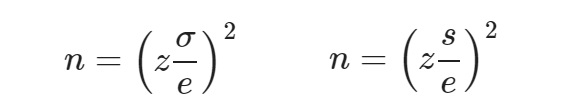

Com sigma sendo com o desvio padrão conhecido e quando não estiver conhecido fazer com s.

Só para lembrar:

- z => Variável normal padronizada
- $\sigma$ => Desvio padrão populacional 
- s => Desvio padrão amostral
- e => Erro inferencial

Voltando o exemplo:

In [78]:
#Trabalhando com desvio padrão populacional pois ele dá, ou seja, trabalhar com sigma.
# Sendo um nível de confiança de 95%, pela aquela tabela que temos anteriormente:
0.5 + 0.95/2

0.975

In [79]:
z = norm.ppf(0.975)
z

1.959963984540054

In [80]:
# Isso tudo já foi feito anteriormente, só fazendo como padrão:
# Agora obtendo sigma, o desvio padrão populacional (dado):
sigma = 3323.39

In [81]:
#Erro inferencial (dado):
e = 100

In [82]:
# Obtendo n aplicando a fórmula:
n =  (z *(sigma/e)) **2
n.round()

4243.0

In [83]:
# Exemplo: Obtendo o tamanho da amostra:

media = 45.5
sigma = 15
significancia = 0.10
confianca = 1 - significancia

z = norm.ppf(0.5 + (confianca / 2))
erro_percentual = 0.10
e = media * erro_percentual

n = (z * (sigma / e)) ** 2
n.round()


29.0

## Cálculo para populações finitas e variáveis quantitativas

Falando ainda de cálculo de tamanho de Amostras, trabalharemos com variáveis quantitativas de uma População Finita, pois no passo anterior trabalhamos com População Infinita.

Veremos um problema com um lote contendo 10mil latas de refrigerante; com isso, já podemos saber a População e perceber que é Finita, pois é uma população pequena e contável.

Foi realizada uma amostra aleatória simples de 100 latas e foi obtido o desvio padrão amostral do conteúdo de cada lata, igual a 12ml.

O fabricante estipula um erro máximo sobre a Média Populacional de apenas 5ml. Para garantirmos o Nível de Confiança de 95%, qual deve ser o tamanho da amostra?


O professor não entra na definição, somente dá as fórmulas para fazer o trabalho, com a mesma separação anterior, caso sabia o desvio padrão populacional ou não saiba:

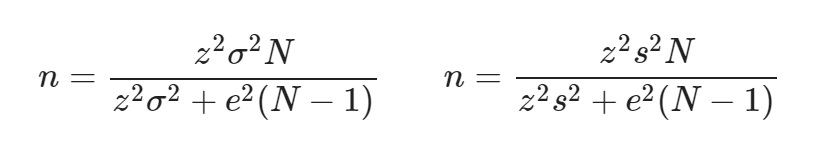

$\sigma$ quando sabe, $s$ quando não sabe.

Esse $N$ é o tamanho da população, nesse caso o que queremos saber é o tamanho da amostra, e tendo a população finita, precisa se ter conhecimento do tamanho total da população.

In [84]:
# Indo para o exemplo:
# Tamanho da população total
N = 10000
# Achando o Z
z = norm.ppf(0.975)


In [85]:
#Desvio padrão amostral:
s = 12
# Erro inferencial
e = 5

In [86]:
# Obtendo n:
n = ((z**2)*(s**2)*N)/((z**2)*(s**2) + (e**2)*(N-1))
n.round()

22.0

In [87]:
# Amostra de sacos de farinha:
N = 2000
z = norm.ppf(0.5 + (0.95 / 2))
s = 480
e = 0.3 * 1000   # Convertendo kg para g

n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
int(n.round())

10

A partir daqui é revisão de tópicos e projeto final, não utilizarei mais essas notas.